## Brief 2 

On considère le site: www.imdb.com

**1- Analyse du Site Web :**

On considère le site imdb et cette URL : https://www.imdb.com/title/tt0108778/episodes/ .

inspectez la structure HTML pour comprendre comment les informations de la série ,ses épisodes et les différentes saisons sont présentées.

Identifiez les balises HTML, les classes et les IDs pertinents qui contiennent les données que vous souhaitez extraire.

**2-Extraction des Informations de Base :**

* 2.1- les épisodes de la saison 1:

Utilisez Beautiful Soup pour envoyer une requête HTTP à la page https://www.imdb.com/title/tt0108778/episodes/  récupérez le contenu HTML.

Récupérez la liste des episodes de la 1ere saison.

Récupérer pour chaque épisode , son numéro, son nom, la date de sortie, la note et la description
 
* 2.2-Récupérer toutes les saisons  

Etendre votre travail précédent pour extraire les les épisodes des 10 saisons de la série



In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 

In [5]:


# L'url du site à scrapper
#url = 'https://www.imdb.com/title/tt0108778/episodes/'
url = 'https://www.imdb.com/title/tt0108778/episodes/?season=10&ref_=ttep'

# ma requete HTTP avec un "GET" au serveur du site identifier dans l'url
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response = requests.get(url, headers=headers)

# J'affiche l'url ainsi que le retour du serveur
print(url, response.status_code)



https://www.imdb.com/title/tt0108778/episodes/?season=10&ref_=ttep 200


In [6]:
# Je demande à beautifulSoup de conserver dans une variable "soup" la page web à scrapper (un script html)
soup = BeautifulSoup(response.content,'html')
#soup

# Extraire infos pour page unique

In [244]:

episodes = soup.find_all('div', class_='ipc-title__text ipc-title__text--reduced')
dates = soup.find_all('span', class_='sc-5372d523-10 knzESm')
ratings = soup.find_all('span', class_='ipc-rating-star--rating')
votecounts = soup.find_all('span', class_='ipc-rating-star--voteCount')
#print (rating)
temp = []

for episode, date, rating, votecount in zip(episodes, dates, ratings, votecounts):
    titre = episode.get_text()[8:]
    saison = episode.get_text()[:3]
    epinumb = episode.get_text()[4:7]
    date_text = date.get_text()
    rating = rating.get_text()
    votecount = votecount.get_text()[2:-1]
    temp.append({'season': saison, 'episode': epinumb, 'title': titre, 'rating': rating, 'votecount': votecount, 'first aired': date_text})
    temp['season']=temp['season'].str.replace('S', '')

df_episodes = pd.DataFrame(temp)
df_episodes.head()

TypeError: list indices must be integers or slices, not str

In [187]:
display(df_episodes)

,season,episode,title,rating,votecount,first aired
0,S10,E1,The One After Joey and Rachel Kiss,8.4,5.4K,"Thu, Sep 25, 2003"
1,S10,E2,The One Where Ross Is Fine,8.7,5.8K,"Thu, Oct 2, 2003"
2,S10,E3,The One with Ross's Tan,8.6,5.6K,"Thu, Oct 9, 2003"
3,S10,E4,The One with the Cake,8.2,4.9K,"Thu, Oct 23, 2003"
4,S10,E5,The One Where Rachel's Sister Babysits,8.0,4.9K,"Thu, Oct 30, 2003"
5,S10,E6,The One with Ross' Grant,8.0,4.9K,"Thu, Nov 6, 2003"
6,S10,E7,The One with the Home Study,8.1,4.7K,"Thu, Nov 13, 2003"
7,S10,E8,The One with the Late Thanksgiving,8.8,5.7K,"Thu, Nov 20, 2003"
8,S10,E9,The One with the Birth Mother,8.4,5K,"Thu, Jan 8, 2004"
9,S10,E10,∙ The One Where Chandler Gets Caught,7.8,4.8K,"Thu, Jan 15, 2004"


In [15]:
df_episodes['first aired'] = pd.to_datetime(
    df_episodes['first aired'], 
    format="%a, %b %d, %Y"
)

### Check

In [158]:
df_episodes

,season,episode,title,rating,votecount,first aired
0,S1,1,The One Where Monica Gets a Roommate,8.1,11K,"Tue, Apr 16, 1996"
1,S1,2,The One with the Sonogram at the End,7.8,8.6K,"Thu, Sep 29, 1994"
2,S1,3,The One with the Thumb,8.0,8.1K,"Thu, Oct 6, 1994"
3,S1,4,The One with George Stephanopoulos,7.9,7.9K,"Thu, Oct 13, 1994"
4,S1,5,The One with the East German Laundry Detergent,8.3,7.9K,"Thu, Oct 20, 1994"
5,S1,6,The One with the Butt,8.0,7.5K,"Thu, Oct 27, 1994"
6,S1,7,The One with the Blackout,8.8,9.3K,"Thu, Nov 3, 1994"
7,S1,8,The One Where Nana Dies Twice,7.9,7.3K,"Thu, Nov 10, 1994"
8,S1,9,The One Where Underdog Gets Away,8.1,7.1K,"Thu, Nov 17, 1994"
9,S1,10,The One with the Monkey,7.9,7.1K,"Thu, Dec 15, 1994"


# Boucle pour toutes les pages

### Definition fonction

In [26]:
def scrape_SeriesPage(page_url):
    temp = []
    #response = requests.get(page_url)
    #soup = BeautifulSoup(response.text, 'html.parser')
    episodes = soup.find_all('div', class_='ipc-title__text ipc-title__text--reduced')
    dates = soup.find_all('span', class_='sc-5372d523-10 knzESm')
    ratings = soup.find_all('span', class_='ipc-rating-star--rating')
    votecounts = soup.find_all('span', class_='ipc-rating-star--voteCount')
    #print (rating)
    

    for episode, date, rating, votecount in zip(episodes, dates, ratings, votecounts):
            titre = episode.get_text()[8:]
            saison = episode.get_text()[:3]
            epinumb = episode.get_text()[4:7]
            date_text = date.get_text()
            rating = rating.get_text()
            votecount = votecount.get_text()[2:-1]
            temp.append({'season': saison, 'episode': epinumb, 'title': titre, 'rating': rating, 'votecount': votecount, 'first aired': date_text})

    df_episodes = pd.DataFrame(temp)
    return df_episodes 

### Trouver nombre de pages

In [27]:
#Récupérer le nbre de pages Max du site

tabs_ul = soup.find('ul', class_='ipc-tabs ipc-tabs--base ipc-tabs--align-left')
season_tabs = tabs_ul.find_all('a')  
num_seasons = len(season_tabs)
print(num_seasons)

10


### Executer Boucle

### LA BOUCLE EST 403 FORBIDDEN

In [30]:
df_Show = []
for i in range(num_seasons): 
    url = f'https://www.imdb.com/title/tt0108778/episodes/?season={i+1}&ref_=ttep'
    print(url)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    print(response.text[:1000])
    df_episodesExt = scrape_SeriesPage(url)
    print(df_episodesExt)
    df_Show.append(df_episodesExt)

# Combine all the season DataFrames into one
#df_Show = pd.concat(df_Show, ignore_index=True)

https://www.imdb.com/title/tt0108778/episodes/?season=1&ref_=ttep
<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
</body>
</html>

Empty DataFrame
Columns: []
Index: []
https://www.imdb.com/title/tt0108778/episodes/?season=2&ref_=ttep
<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
</body>
</html>

Empty DataFrame
Columns: []
Index: []
https://www.imdb.com/title/tt0108778/episodes/?season=3&ref_=ttep
<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
</body>
</html>

Empty DataFrame
Columns: []
Index: []
https://www.imdb.com/title/tt0108778/episodes/?season=4&ref_=ttep
<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
</body>
</html>

Empty DataFrame
Columns: []
Index: []
https://www.imdb.com/title/tt0108778/episodes/?season=5&ref_=ttep
<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h

### Utilise headers pour montrer pate blanche

In [ ]:
df_ShowTmp = []
for i in range(num_seasons): 
    url = f'https://www.imdb.com/title/tt0108778/episodes/?season={i+1}&ref_=ttep'
    print('traitement\n', url)
    headers = {'User-Agent': 'Mozilla/5.0 ...'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    #print(response.text[:1000])
    df_episodesExt = scrape_SeriesPage(url)
    display(df_episodesExt.head(5))
    df_ShowTmp.append(df_episodesExt)


df_Show = pd.concat(df_ShowTmp, ignore_index=True)
df_Show.info()
df_Show.describe()
df_Show.sample(20)

traitement
 https://www.imdb.com/title/tt0108778/episodes/?season=1&ref_=ttep


,season,episode,title,rating,votecount,first aired
0,S1.,1 ∙,The One Where Monica Gets a Roommate,8.1,11K,"Tue, Apr 16, 1996"
1,S1.,2 ∙,The One with the Sonogram at the End,7.8,8.6K,"Thu, Sep 29, 1994"
2,S1.,3 ∙,The One with the Thumb,8.0,8.1K,"Thu, Oct 6, 1994"
3,S1.,4 ∙,The One with George Stephanopoulos,7.9,7.9K,"Thu, Oct 13, 1994"
4,S1.,5 ∙,The One with the East German Laundry Detergent,8.3,7.9K,"Thu, Oct 20, 1994"


traitement
 https://www.imdb.com/title/tt0108778/episodes/?season=2&ref_=ttep


,season,episode,title,rating,votecount,first aired
0,S2.,1 ∙,The One with Ross's New Girlfriend,8.4,6.7K,"Thu, Sep 21, 1995"
1,S2.,2 ∙,The One with the Breast Milk,8.0,6.4K,"Thu, Sep 28, 1995"
2,S2.,3 ∙,The One Where Heckles Dies,8.2,6.4K,"Thu, Oct 5, 1995"
3,S2.,4 ∙,The One with Phoebe's Husband,7.8,6.2K,"Thu, Oct 12, 1995"
4,S2.,5 ∙,The One with Five Steaks and an Eggplant,8.1,6.2K,"Thu, Oct 19, 1995"


traitement
 https://www.imdb.com/title/tt0108778/episodes/?season=3&ref_=ttep


,season,episode,title,rating,votecount,first aired
0,S3.,1 ∙,The One with the Princess Leia Fantasy,8.3,6.1K,"Mon, Nov 17, 1997"
1,S3.,2 ∙,The One Where No One's Ready,8.9,8.1K,"Thu, Sep 26, 1996"
2,S3.,3 ∙,The One with the Jam,7.8,5.8K,"Thu, Oct 3, 1996"
3,S3.,4 ∙,The One with the Metaphorical Tunnel,7.8,5.5K,"Thu, Oct 10, 1996"
4,S3.,5 ∙,The One with Frank Jr.,8.0,5.7K,"Thu, Oct 17, 1996"


traitement
 https://www.imdb.com/title/tt0108778/episodes/?season=4&ref_=ttep


,season,episode,title,rating,votecount,first aired
0,S4.,1 ∙,The One with the Jellyfish,8.9,7K,"Thu, Sep 25, 1997"
1,S4.,2 ∙,The One with the Cat,7.9,5.5K,"Thu, Oct 2, 1997"
2,S4.,3 ∙,The One with the 'Cuffs,8.4,5.7K,"Thu, Oct 9, 1997"
3,S4.,4 ∙,The One with the Ballroom Dancing,8.0,5.4K,"Thu, Oct 16, 1997"
4,S4.,5 ∙,The One with Joey's New Girlfriend,8.2,5.5K,"Thu, Oct 30, 1997"


traitement
 https://www.imdb.com/title/tt0108778/episodes/?season=5&ref_=ttep


,season,episode,title,rating,votecount,first aired
0,S5.,1 ∙,The One After Ross Says Rachel,8.8,6.2K,"Thu, Sep 24, 1998"
1,S5.,2 ∙,The One with All the Kissing,8.9,6.3K,"Thu, Oct 1, 1998"
2,S5.,3 ∙,The One Hundredth,8.7,5.8K,"Wed, Mar 24, 1999"
3,S5.,4 ∙,The One Where Phoebe Hates PBS,8.1,5.2K,"Sun, Oct 18, 1998"
4,S5.,5 ∙,The One with the Kips,8.6,5.6K,"Thu, Oct 29, 1998"


traitement
 https://www.imdb.com/title/tt0108778/episodes/?season=6&ref_=ttep


,season,episode,title,rating,votecount,first aired
0,S6.,1 ∙,The One After Vegas,8.6,5.6K,"Thu, Sep 23, 1999"
1,S6.,2 ∙,The One Where Ross Hugs Rachel,8.0,5K,"Thu, Sep 30, 1999"
2,S6.,3 ∙,The One with Ross's Denial,8.0,5K,"Thu, Oct 7, 1999"
3,S6.,4 ∙,The One Where Joey Loses His Insurance,8.3,5.2K,"Thu, Oct 14, 1999"
4,S6.,5 ∙,The One with Joey's Porsche,8.0,5K,"Thu, Oct 21, 1999"


traitement
 https://www.imdb.com/title/tt0108778/episodes/?season=7&ref_=ttep


,season,episode,title,rating,votecount,first aired
0,S7.,1 ∙,The One with Monica's Thunder,8.2,5.3K,"Thu, Oct 12, 2000"
1,S7.,2 ∙,The One with Rachel's Book,8.1,4.9K,"Thu, Oct 12, 2000"
2,S7.,3 ∙,The One with Phoebe's Cookies,7.9,4.9K,"Thu, Oct 19, 2000"
3,S7.,4 ∙,The One with Rachel's Assistant,7.9,4.9K,"Thu, Oct 26, 2000"
4,S7.,5 ∙,The One with the Engagement Picture,7.9,4.9K,"Thu, Nov 2, 2000"


traitement
 https://www.imdb.com/title/tt0108778/episodes/?season=8&ref_=ttep


,season,episode,title,rating,votecount,first aired
0,S8.,1 ∙,The One After I Do,8.6,5.3K,"Thu, Sep 27, 2001"
1,S8.,2 ∙,The One with the Red Sweater,9.0,6.1K,"Thu, Apr 4, 2002"
2,S8.,3 ∙,The One Where Rachel Tells...,8.6,5K,"Thu, Oct 11, 2001"
3,S8.,4 ∙,The One with the Videotape,9.2,7.1K,"Thu, Oct 18, 2001"
4,S8.,5 ∙,The One with Rachel's Date,7.9,4.8K,"Thu, Oct 25, 2001"


traitement
 https://www.imdb.com/title/tt0108778/episodes/?season=9&ref_=ttep


,season,episode,title,rating,votecount,first aired
0,S9.,1 ∙,The One Where No One Proposes,8.5,5.1K,"Thu, Sep 26, 2002"
1,S9.,2 ∙,The One Where Emma Cries,8.4,5.1K,"Thu, Oct 3, 2002"
2,S9.,3 ∙,The One with the Pediatrician,8.1,4.7K,"Thu, Oct 10, 2002"
3,S9.,4 ∙,The One with the Sharks,8.0,4.8K,"Thu, Oct 17, 2002"
4,S9.,5 ∙,The One with Phoebe's Birthday Dinner,8.3,4.9K,"Thu, Oct 31, 2002"


traitement
 https://www.imdb.com/title/tt0108778/episodes/?season=10&ref_=ttep


,season,episode,title,rating,votecount,first aired
0,S10,E1,The One After Joey and Rachel Kiss,8.4,5.4K,"Thu, Sep 25, 2003"
1,S10,E2,The One Where Ross Is Fine,8.7,5.8K,"Thu, Oct 2, 2003"
2,S10,E3,The One with Ross's Tan,8.6,5.6K,"Thu, Oct 9, 2003"
3,S10,E4,The One with the Cake,8.2,4.9K,"Thu, Oct 23, 2003"
4,S10,E5,The One Where Rachel's Sister Babysits,8.0,4.9K,"Thu, Oct 30, 2003"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   season       235 non-null    object
 1   episode      235 non-null    object
 2   title        235 non-null    object
 3   rating       235 non-null    object
 4   votecount    235 non-null    object
 5   first aired  235 non-null    object
dtypes: object(6)
memory usage: 11.1+ KB


,season,episode,title,rating,votecount,first aired
39,S2.,16,The One Where Joey Moves Out,8.5,6K,"Thu, Feb 15, 1996"
13,S1.,14,The One with the Candy Hearts,8.1,6.8K,"Thu, Feb 9, 1995"
122,S6.,2 ∙,The One Where Ross Hugs Rachel,8.0,5K,"Thu, Sep 30, 1999"
114,S5.,18,The One Where Rachel Smokes,7.8,5.1K,"Thu, Apr 8, 1999"
76,S4.,4 ∙,The One with the Ballroom Dancing,8.0,5.4K,"Thu, Oct 16, 1997"
45,S2.,22,The One with the Two Parties,8.9,7.2K,"Thu, May 2, 1996"
101,S5.,5 ∙,The One with the Kips,8.6,5.6K,"Thu, Oct 29, 1998"
180,S8.,11,The One with Ross's Step Forward,7.8,4.6K,"Thu, Dec 13, 2001"
150,S7.,5 ∙,The One with the Engagement Picture,7.9,4.9K,"Thu, Nov 2, 2000"
40,S2.,17,The One Where Eddie Moves In,8.1,5.9K,"Thu, Feb 22, 1996"


# CLEANUP

## Verif Doublons Nan et NULL


In [23]:
zeroes = (df_Show.isna().sum().sum())
zeroes2 = (df_Show.isnull().sum().sum())
duplicates = (df_Show.duplicated().sum())
print("dups:", duplicates, 'NaN:', zeroes, 'NULL:', zeroes2)
#print(type(zeroes))


dups: 0 NaN: 0 NULL: 0


In [24]:
print(df_Show.isna().sum())

season         0
episode        0
title          0
rating         0
votecount      0
first aired    0
year           0
dtype: int64


## Nettoyage dates

In [25]:
display(df_Show.sample(20))

,season,episode,title,rating,votecount,first aired,year
175,8,6,The One with the Halloween Party,8.4,5.2,2001-11-01,2001
17,1,18,The One with All the Poker,8.7,7.5,1995-03-02,1995
73,4,1,The One with the Jellyfish,8.9,7.0,1997-09-25,1997
50,3,3,The One with the Jam,7.8,5.8,1996-10-03,1996
105,5,9,The One with Ross's Sandwich,9.0,6.7,1998-12-10,1998
100,5,4,The One Where Phoebe Hates PBS,8.1,5.2,1998-10-18,1998
115,5,19,The One Where Ross Can't Flirt,8.6,5.6,1999-04-22,1999
191,8,22,The One Where Rachel Is Late,8.2,4.6,2002-05-09,2002
66,3,19,The One with the Tiny T-Shirt,8.0,5.4,1997-12-11,1997
185,8,16,The One Where Joey Tells Rachel,8.1,4.7,2002-02-28,2002


In [10]:
df_Show['first aired'] = pd.to_datetime(
    df_Show['first aired'], 
    format="%a, %b %d, %Y"
)

## Nettoyage saisons

In [12]:
df_Show['season'] = df_Show['season'].str.replace('.', '')
df_Show['season'] = df_Show['season'].str.replace('S', '')

## Nettoyage Episodes

In [13]:
df_Show['episode'] = df_Show['episode'].str.replace('E', '')
df_Show['episode'] = df_Show['episode'].str.replace(' ∙', '')

## Nettoyage Titre

In [14]:
df_Show['title'] = df_Show['title'].str.replace('∙', '')

## Nettoyage Votecount

In [15]:
df_Show['votecount'] = df_Show['votecount'].str.replace('K', '')

## Verif Types Colonnes

In [17]:
df_Show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   season       235 non-null    object        
 1   episode      235 non-null    object        
 2   title        235 non-null    object        
 3   rating       235 non-null    object        
 4   votecount    235 non-null    object        
 5   first aired  235 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 11.1+ KB


### Assignation bon type par colonne
ca permet de verifier aussi si le clean s'est bien passe

In [18]:
df_Show['votecount'] = df_Show['votecount'].astype(float)
df_Show['rating'] = df_Show['rating'].astype(float)
df_Show['season'] = df_Show['season'].astype(int)
df_Show['episode'] = df_Show['episode'].astype(int)

In [19]:
df_Show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   season       235 non-null    int64         
 1   episode      235 non-null    int64         
 2   title        235 non-null    object        
 3   rating       235 non-null    float64       
 4   votecount    235 non-null    float64       
 5   first aired  235 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 11.1+ KB


In [20]:
disp = df_Show[df_Show['title'].str.contains("Phoebe")]
display(disp)

,season,episode,title,rating,votecount,first aired
27,2,4,The One with Phoebe's Husband,7.8,6.2,1995-10-12
32,2,9,The One with Phoebe's Dad,7.8,6.0,1995-12-14
61,3,14,The One with Phoebe's Ex-Partner,7.6,5.6,1997-02-06
83,4,11,The One with Phoebe's Uterus,8.4,5.7,1998-01-08
100,5,4,The One Where Phoebe Hates PBS,8.1,5.2,1998-10-18
127,6,7,The One Where Phoebe Runs,8.2,5.1,1999-11-11
148,7,3,The One with Phoebe's Cookies,7.9,4.9,2000-10-19
198,9,5,The One with Phoebe's Birthday Dinner,8.3,4.9,2002-10-31
205,9,12,The One with Phoebe's Rats,7.7,4.7,2003-01-16
228,10,12,The One with Phoebe's Wedding,8.8,5.5,2004-02-12


# Visualisations

## Rating par saisons

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_26012\64139769.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasratingmean, x='season', y='rating', palette='viridis')  # x=season, y=mean rating


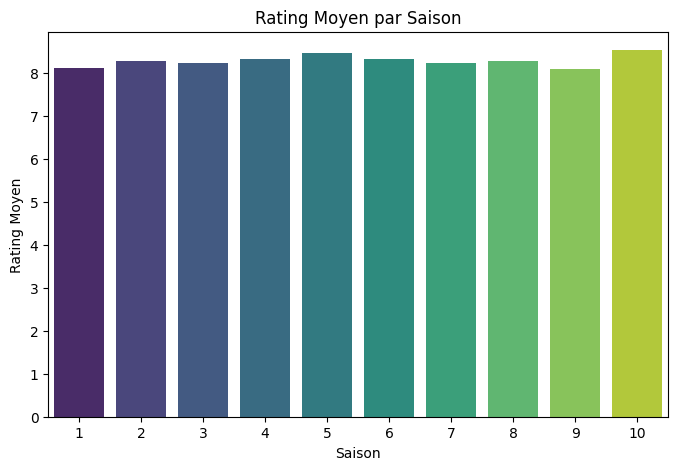

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
seasratingmean = df_Show.groupby('season')['rating'].mean().reset_index()
sns.barplot(data=seasratingmean, x='season', y='rating', palette='viridis')  # x=season, y=mean rating
plt.title('Rating Moyen par Saison')
plt.xlabel('Saison')
plt.ylabel('Rating Moyen')
plt.show()

## Top 10 countvotes par episodes

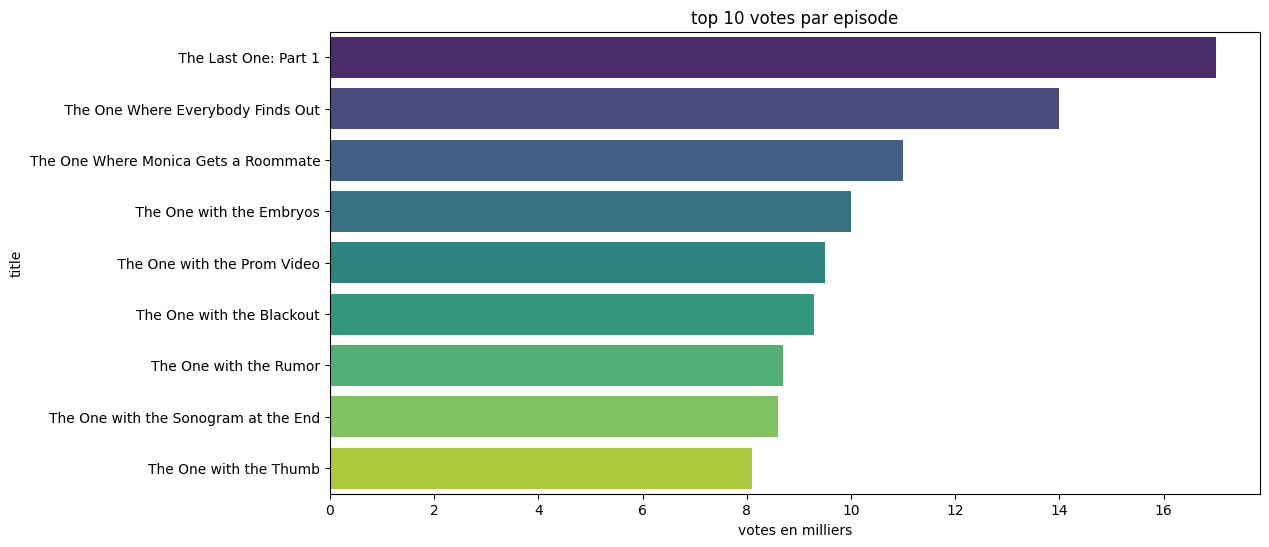

In [352]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
top10 = df_Show.nlargest(10, 'votecount')
filtered_top10 = top10[top10['votecount'] < 800]
sns.barplot(data=filtered_top10, x='votecount', y='title', palette='viridis') 
plt.title('top 10 votes par episode')
plt.xlabel('votes en milliers')
plt.ylabel('title')
plt.show()

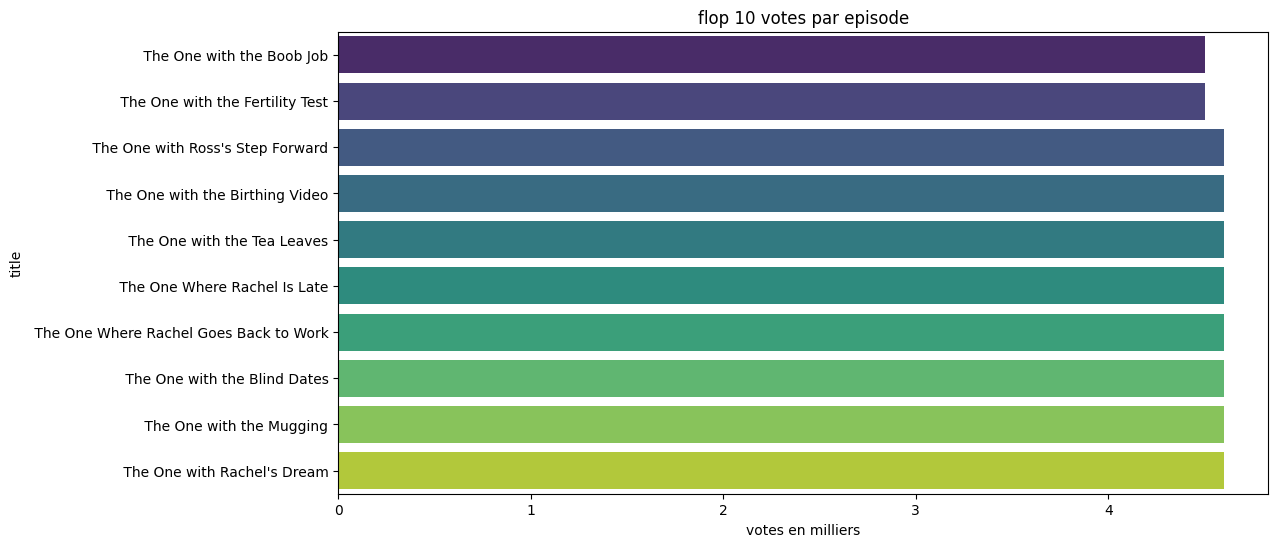

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
top10 = df_Show.nsmallest(10, 'votecount')
filtered_top10 = top10[top10['votecount'] < 800]
sns.barplot(data=filtered_top10, x='votecount', y='title', palette='viridis') 
plt.title('flop 10 votes par episode')
plt.xlabel('votes en milliers')
plt.ylabel('title')
plt.show()

## Creation colonne Popularite

In [280]:
import numpy as np

C = df_Show['rating'].mean()
m = df_Show['votecount'].quantile(0.8)  # threshold at 80th percentile, or choose your own
v = df_Show['votecount']
R = df_Show['rating']

df_Show['popularity'] = (v / (v + m)) * R + (m / (v + m)) * C

In [284]:
df_Show['popularity'] = round(df_Show['popularity'], 1)

In [293]:
display(df_Show.nlargest(10, 'popularity'))

,season,episode,title,rating,votecount,first aired,popularity,year
234,10,18,The Last One: Part 2,9.5,804.0,2004-05-06,9.5,2004
110,5,14,The One Where Everybody Finds Out,9.7,14.0,1999-02-11,9.2,1999
233,10,17,The Last One: Part 1,9.6,17.0,2004-05-06,9.2,2004
84,4,12,The One with the Embryos,9.4,10.0,1998-01-15,9.0,1998
37,2,14,The One with the Prom Video,9.3,9.5,1996-02-01,8.9,1996
145,6,25,The One with the Proposal: Part 2,9.2,7.3,2000-05-18,8.8,2000
173,8,4,The One with the Videotape,9.2,7.1,2001-10-18,8.8,2001
178,8,9,The One with the Rumor,9.2,8.7,2001-11-22,8.8,2001
53,3,6,The One with the Flashback,9.0,7.4,1996-10-31,8.7,1996
63,3,16,The One with the Morning After,9.0,7.3,1997-12-08,8.7,1997


## Total votes par annees

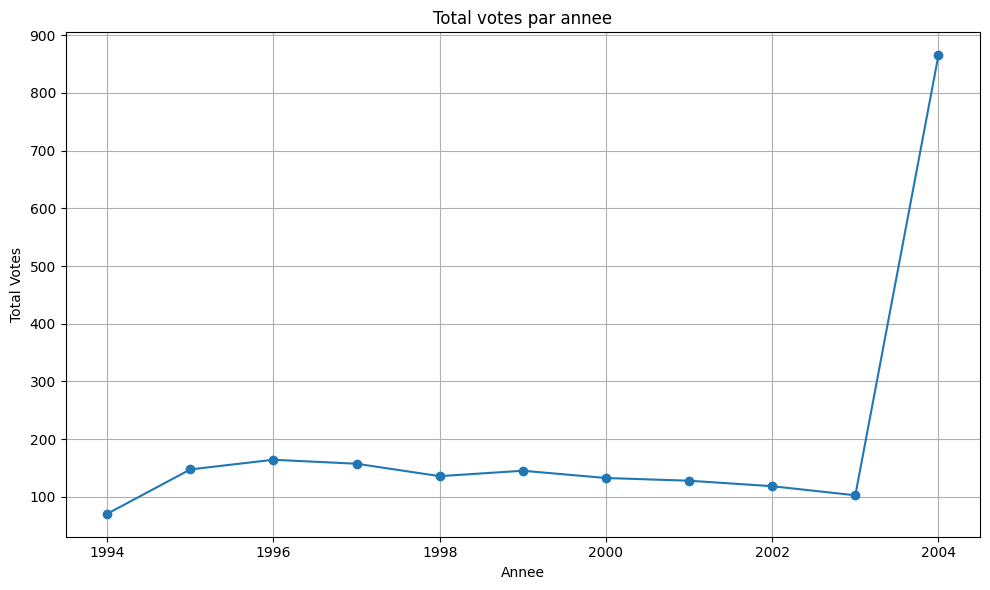

In [22]:
df_Show['first aired'] = pd.to_datetime(df_Show['first aired'], errors='coerce')
df_Show['year'] = df_Show['first aired'].dt.year
votes_per_year = df_Show.groupby('year')['votecount'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(votes_per_year['year'], votes_per_year['votecount'], marker='o')
plt.title('Total votes par annee')
plt.xlabel('Annee')
plt.ylabel('Total Votes')
plt.grid(True)
plt.tight_layout()
plt.show()

## Wordcloud des titres d'episodes

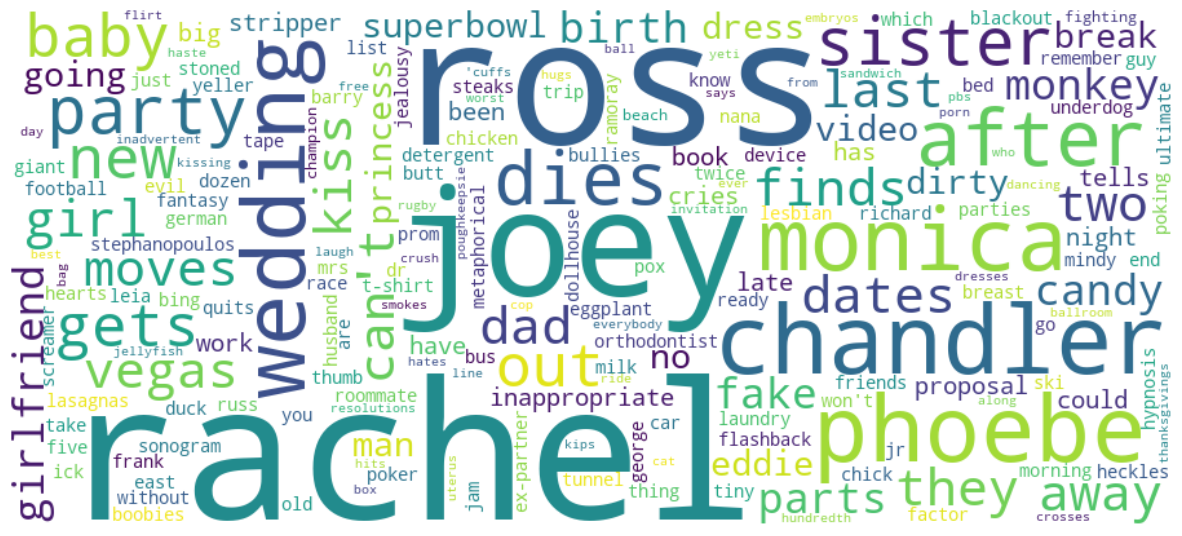

In [318]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

# Add your custom list of words to exclude
excluded_words = {'part', 'that', 'all', 'the', 'one', 'with', 'and', 'a', 'of', 'to', 'in', 'is', 'for', 'on', 'at', 'by', 'an', 'be', 'where', '1', '2'}

def normalize_word(word):
    word = re.sub(r"'s$", '', word.lower())       # Remove possessive 's
    word = re.sub(r"'re$", '', word)  # Remove 're ending
    word = re.sub(r"[^a-z0-9]+$", '', word)      # Remove trailing punctuation
    return word

words = " ".join(df_Show['title']).split()
normalized_words = [normalize_word(word) for word in words if normalize_word(word) not in excluded_words]

data = dict(Counter(normalized_words))

# Generate and display the word cloud
wordcloud = WordCloud(background_color="white", max_font_size=150,  width=900, height=400, relative_scaling=0.5)
wordcloud = wordcloud.generate_from_frequencies(data)

plt.figure(figsize=(15, 11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Recurence des prenoms des personnages dans les titres d'episodes

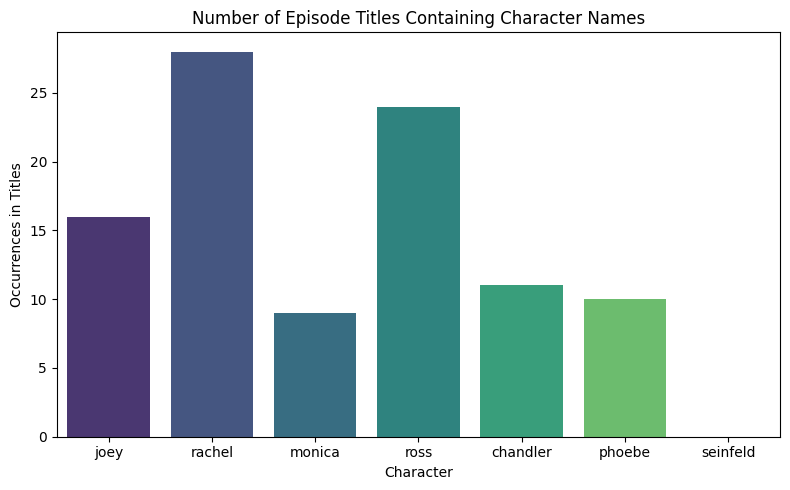

In [ ]:
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

# List of main character names (lowercase for consistency)
main_characters = ['joey', 'rachel', 'monica', 'ross', 'chandler', 'phoebe', 'seinfeld']

# Function to normalize (remove possessive 's and lowercase)
def normalize_titles(title):
    title = title.lower()
    # Remove possessive 's (e.g., "joey's" -> "joey")
    title = re.sub(r"(\w+)'s\b", r"\1", title)
    return title

# Normalize all titles in the DataFrame
titles = df_Show['title'].dropna().apply(normalize_titles)

# Count occurrences for each character name
char_counts = [titles.str.count(rf'\b{char}\b').sum() for char in main_characters]
titles2 = pd.DataFrame({
    'character': main_characters,
    'count': char_counts
})
# Make the bar chart
plt.figure(figsize=(8, 5))
#plt.bar(main_characters, char_counts, color='skyblue')
sns.barplot(data=titles2, x='character', y='count', palette='viridis') 
plt.title("Nombre de Titres d'episodes contenant le Prenom d'un Personnage")
plt.xlabel("Prenom")
plt.ylabel("Occurrences dans le titre")
plt.tight_layout()
plt.show()

# Ressources utiles



https://www.crummy.com/software/BeautifulSoup/bs4/doc/

https://www.crummy.com/software/BeautifulSoup/bs4/doc/#css-selectors


